In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/simulated_bond_market_making.csv', index_col='timestamp', parse_dates=True)

In [4]:
cash_agg = df['cash'].resample('539min').mean()
book_agg = df['inventory'].resample('539min').mean()
volume_agg = df['volume'].resample('539min').sum()

In [5]:
cash_return = cash_agg.diff()
cumulative_cash = cash_agg - cash_agg.iloc[0]
inventory_std = df['inventory'].resample('539min').std()
inventory_max_abs = df['inventory'].resample('539min').apply(lambda x: x.abs().max())
daily_pnl = cash_agg.diff().dropna()
sharpe = daily_pnl.mean() / daily_pnl.std()
annualized_sharpe = sharpe * np.sqrt(252)
running_max = cash_agg.cummax()
drawdown = running_max - cash_agg
max_drawdown = drawdown.max()
turnover_ratio = volume_agg / (book_agg.abs() + 1e-5)


In [6]:
performance_summary = pd.DataFrame({
    'cash': cash_agg,
    'daily_pnl': cash_agg.diff(),
    'inventory_mean': book_agg,
    'inventory_max_abs': inventory_max_abs,
    'volume': volume_agg,
})


In [7]:
performance_summary

,cash,daily_pnl,inventory_mean,inventory_max_abs,volume
timestamp,,,,,
2025-07-03 00:00:00,3.847420,NaN,-0.000565,2,625
2025-07-03 08:59:00,47.159723,43.312303,0.005782,3,6007
2025-07-03 17:58:00,122.989912,75.830189,-0.001206,3,5740
2025-07-04 02:57:00,196.885371,73.895459,-0.011039,3,5539
2025-07-04 11:56:00,272.933128,76.047756,0.007236,3,6019
...,...,...,...,...,...
2025-09-25 14:14:00,16748.285250,76.005552,0.002752,4,5876
2025-09-25 23:13:00,16825.343791,77.058541,0.006865,3,5834
2025-09-26 08:12:00,16901.277689,75.933898,0.004422,5,5904


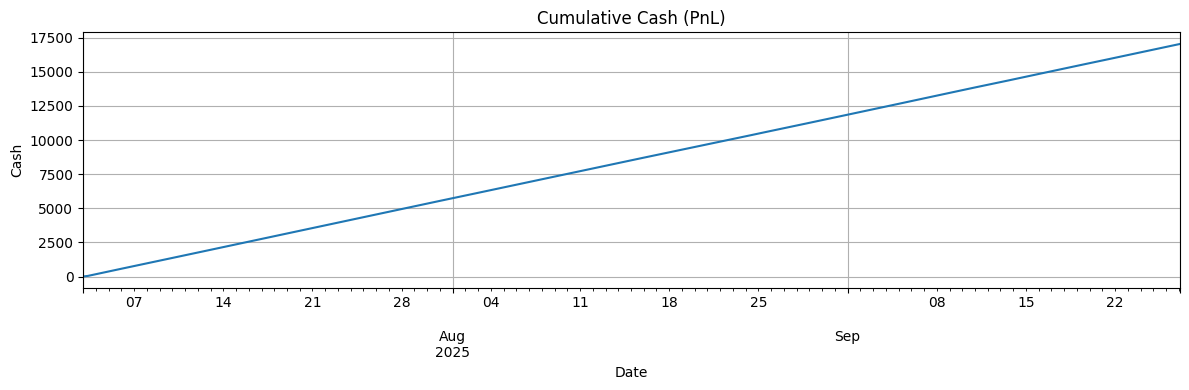

In [11]:
plt.figure(figsize=(12, 4))
cash_agg.plot()
plt.title('Cumulative Cash (PnL)')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.grid(True)
plt.tight_layout()
plt.show()

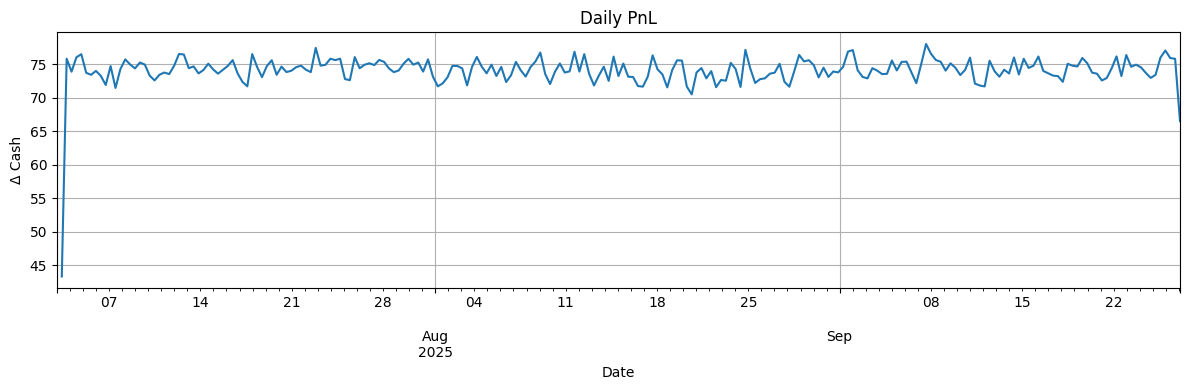

In [12]:
plt.figure(figsize=(12, 4))
cash_agg.diff().plot()
plt.title('Daily PnL')
plt.xlabel('Date')
plt.ylabel('Δ Cash')
plt.grid(True)
plt.tight_layout()
plt.show()


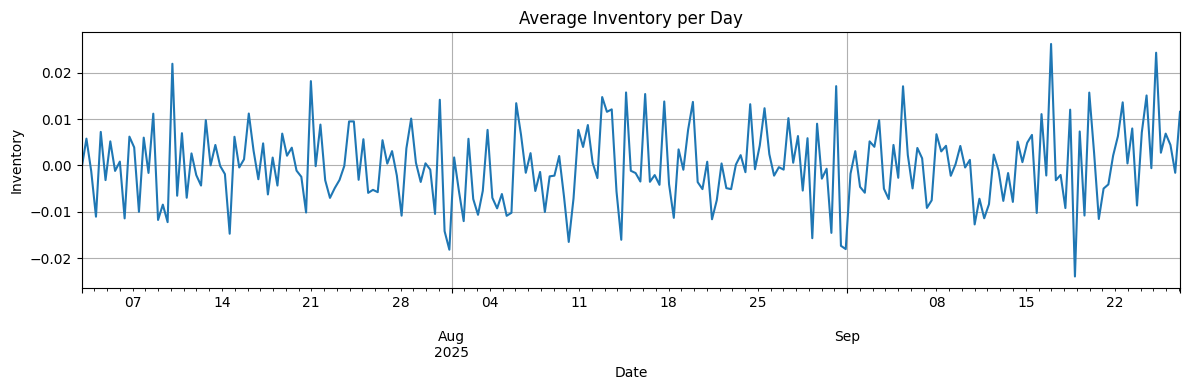

In [13]:
plt.figure(figsize=(12, 4))
book_agg.plot()
plt.title('Average Inventory per Day')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.grid(True)
plt.tight_layout()
plt.show()


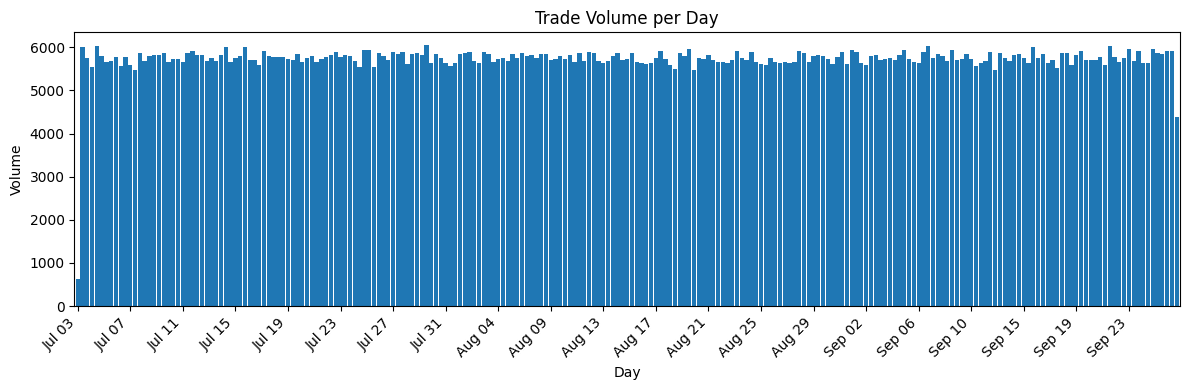

In [20]:
plt.figure(figsize=(12, 4))
ax = volume_agg.plot(kind='bar', width=0.9)

plt.title('Trade Volume per Day')
plt.xlabel('Day')
plt.ylabel('Volume')

# Show max 20 x-ticks evenly spaced
tick_step = max(1, len(volume_agg) // 20)
tick_positions = range(0, len(volume_agg), tick_step)
tick_labels = volume_agg.index[tick_positions].strftime('%b %d')

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

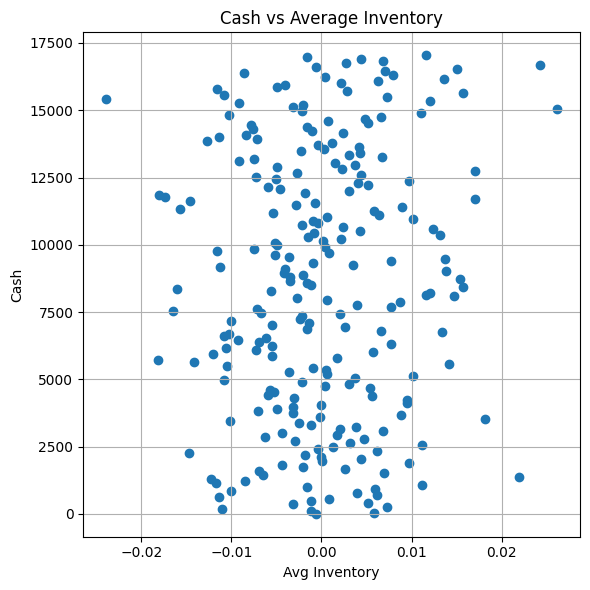

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(book_agg, cash_agg)
plt.title('Cash vs Average Inventory')
plt.xlabel('Avg Inventory')
plt.ylabel('Cash')
plt.grid(True)
plt.tight_layout()
plt.show()


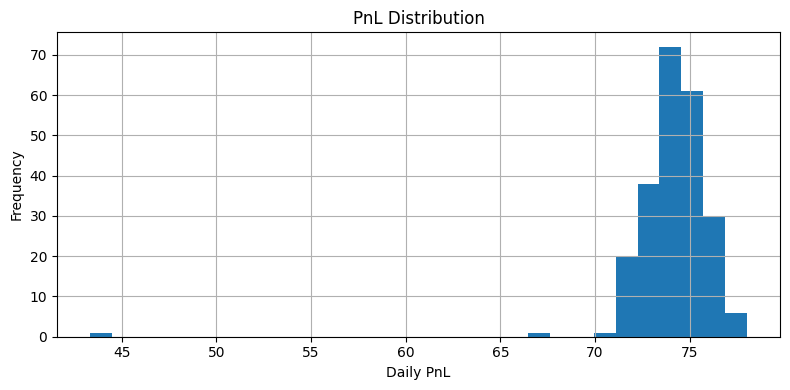

In [16]:
plt.figure(figsize=(8, 4))
cash_agg.diff().dropna().hist(bins=30)
plt.title('PnL Distribution')
plt.xlabel('Daily PnL')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


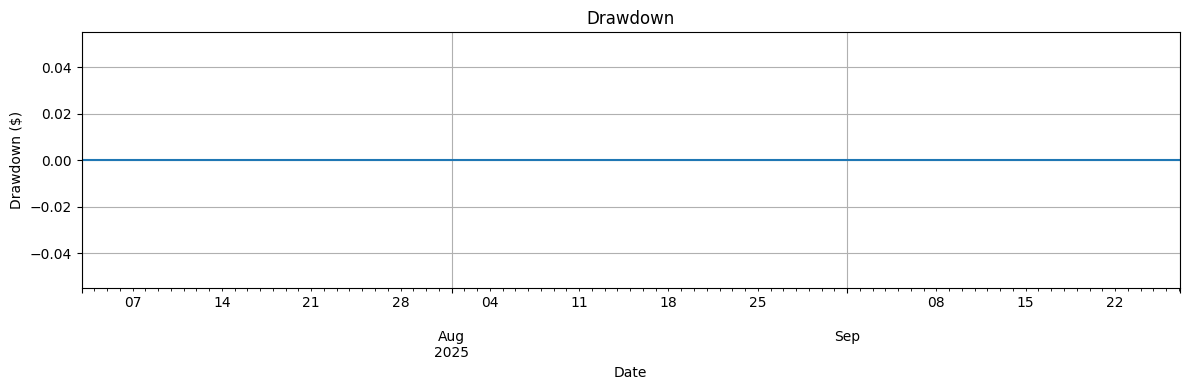

In [19]:
running_max = cash_agg.cummax()
drawdown = running_max - cash_agg

plt.figure(figsize=(12, 4))
drawdown.plot()
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
